In [2]:
# Imports
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
batch_size_train = 64

In [4]:
batch_size_test = 500
transform = transforms.Compose([
    transforms.ToTensor(), # Transform to tensor, so scale data to [0.1] range
    transforms.Normalize((0.1307,),(0.3081,)) # Scale to have zero mean and standard deviation. Values of mean and STD taken as given.
])

In [5]:
# Load train data
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/', 
                                                                      train=True, download=True, 
                                                                      transform=transform),
                                                                      batch_size=batch_size_train, shuffle=True)

100.0%
100.0%
100.0%
100.0%


In [6]:
# Load test data
test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/', 
                                                                      train=False, download=True, 
                                                                      transform=transform),
                                                                      batch_size=batch_size_test, shuffle=True)

In [7]:
# Get a batch of the test data. Shape shold be %batch_size_test, 1, 28, 28
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [8]:
example_data.shape

torch.Size([500, 1, 28, 28])

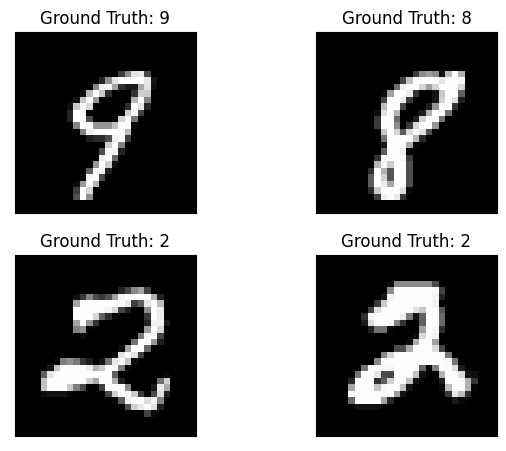

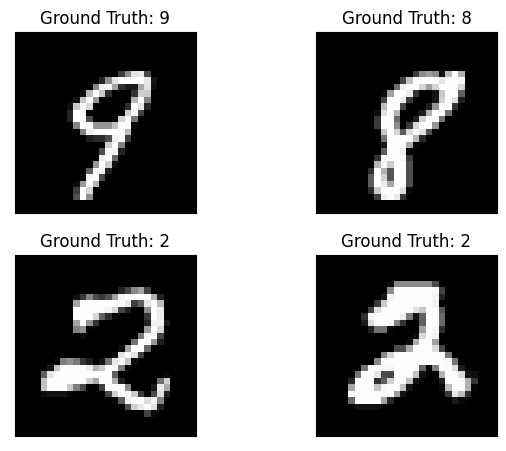

In [9]:
# Print examples of the handwritten digits and the targets (ground truth)
fig = plt.figure()
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [26]:
class DigitClassifier(nn.Module):
    
    def __init__(self) -> None:
        super(DigitClassifier, self).__init__()

        self.fc1 = nn.Linear(784, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))

        return F.log_softmax(x, -1)



In [27]:
network = DigitClassifier()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

In [28]:
network

DigitClassifier(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)

In [29]:
num_epochs = 5  # Adjust based on available time and computing power

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Reset gradients
        outputs = network(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print("Training Complete!")


Epoch 1, Loss: 0.43602806269359995
Epoch 2, Loss: 0.309574984927485
Epoch 3, Loss: 0.29330882592114815
Epoch 4, Loss: 0.2843679347351543
Epoch 5, Loss: 0.2777012040389817
Training Complete!


In [30]:
correct = 0
total = 0

with torch.no_grad():  # No need to track gradients
    for images, labels in test_loader:
        outputs = network(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 92.12%


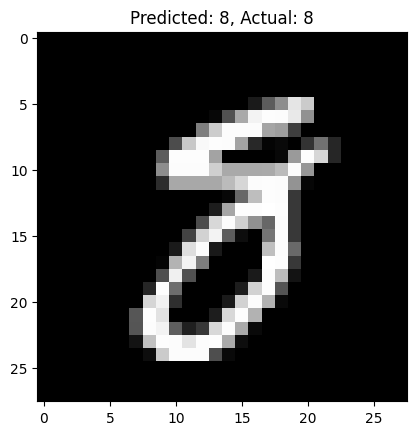

In [31]:
# Get a random test image
images, labels = next(iter(test_loader))
image = images[0].numpy().squeeze()

# Get prediction
output = network(images[0].unsqueeze(0))
_, predicted = torch.max(output, 1)

# Show image and prediction
plt.imshow(image, cmap="gray")
plt.title(f"Predicted: {predicted.item()}, Actual: {labels[0].item()}")
plt.show()